In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
#!pip install tabula-py
from tabula import read_pdf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor


In [5]:
train_df = pd.read_csv('/content/drive/MyDrive/Eye empathy/test_merged.csv')
train_df.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,3082.0,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
1,3083.0,23419315,512092386,NaN,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,NaN,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
2,3084.0,23426120,512099191,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
3,3085.0,23434449,512107520,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
4,3086.0,23442782,512115853,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN


In [6]:

#importing the first questionnaire
ques1 = pd.read_csv('/content/drive/MyDrive/Eye empathy/Questionnaire_datasetIA.csv', encoding = 'latin-1' )

In [7]:
#columns and what they represent 
#column_meanings = read_pdf('/content/drive/MyDrive/EYET4EMPATHY /columns_explained.pdf', encoding= 'latin-1', stream = True, pages= 'all')
#column_meanings[0]

#EDA/Data Cleaning

In [10]:
#visualizing sparseness of the first 25 features
#sns.heatmap(train_df_subset.iloc[:,:25].isnull(), cbar = False)

In [11]:
#visualizing sparsity of the remaining of the remaining features 
#sns.heatmap(train_df_subset.iloc[:,25:].isnull(), cbar = False)

Features that will be dropped due to high percentage of null values:

Mouse position Y 

Mouse position X 

Event 

Event Value 

Unnamed: 0 will be dropped because it emerged from the merging of the datasets.

Recording Timestamp is just a unique identifier and will not be of use to the predictions here. Computer Timestamp will also not be of any applicable usage in the predictions.







In [12]:
#selecting the subset of the data that has the pupil dilations to be non-null values
train_df_subset = train_df[(train_df['Pupil diameter left'].notnull()) & (train_df['Pupil diameter right'].notnull())]
train_df_subset

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
4,3086.0,23442782,512115853,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
7,3089.0,23467779,512140850,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
10,3092.0,23492835,512165906,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Fixation,117.0,64.0,971.0,341.0,"0,5073","0,3160",NaN,NaN
13,3095.0,23517775,512190846,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Unclassified,17.0,187.0,NaN,NaN,NaN,NaN,NaN,NaN
16,3098.0,23542772,512215843,Eye Tracker,Test group experiment,29.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,649.0,Unclassified,33.0,188.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777079,100601,74063793.0,774735001.0,Eye Tracker,Test group experiment,29.10.2020,Participant0003,Recording10,01.10.2020,01.10.2020,...,649.0,Unclassified,50.0,756.0,NaN,NaN,NaN,NaN,NaN,NaN
3777082,100604,74088816.0,774760024.0,Eye Tracker,Test group experiment,29.10.2020,Participant0003,Recording10,01.10.2020,01.10.2020,...,649.0,Unclassified,50.0,756.0,NaN,NaN,NaN,NaN,NaN,NaN
3777087,100609,74113753.0,774784961.0,Eye Tracker,Test group experiment,29.10.2020,Participant0003,Recording10,01.10.2020,01.10.2020,...,649.0,Unclassified,17.0,757.0,NaN,NaN,NaN,NaN,NaN,NaN
3777093,100615,74163743.0,774834951.0,Eye Tracker,Test group experiment,29.10.2020,Participant0003,Recording10,01.10.2020,01.10.2020,...,649.0,Unclassified,8.0,759.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
train_df_subset['Sensor'].value_counts()

Eye Tracker    801848
Sensor            359
Name: Sensor, dtype: int64

The feature 'Sensor' which represents the sensor type used in the data gathering is greatly imbalanced and also won't be of use to HR in empathy assessment during interviews. 

In [14]:
train_df_subset['Participant name'].unique()

array(['Participant0001', 'Participant name', 'Participant0003',
       'Participant0005', 'Participant0007', 'Participant0009',
       'Participant0011', 'Participant0013', 'Participant0015',
       'Participant0017', 'Participant0019', 'Participant0021',
       'Participant0023', 'Participant0025', 'Participant0027',
       'Participant0029', 'Participant0031', 'Participant0033',
       'Participant0035', 'Participant0037', 'Participant0039',
       'Participant0041', 'Participant0043', 'Participant0045',
       'Participant0047', 'Participant0049', 'Participant0051',
       'Participant0053', 'Participant0055', 'Participant0057',
       'Participant0059'], dtype=object)

The participant names can be engineered to extract the participant number will then be used to assign the empathy scores from the questionnaire dataset. Rows having participant name as 'participant name' wil be dropped because there is no alternative method of assigning the empathy scores to them. 

In [15]:
train_df_subset.drop(train_df_subset[train_df_subset['Participant name'] == 'Participant name'].index, inplace = True)

In [16]:
#function to extract the id from the participant name
def id(num):
  if type(num) is str:
    c = list(num)
    d = int(''.join(c[-2:]))
    return d
  else:
    return 'NaN'
train_df_subset['id'] = train_df_subset['Participant name'].apply(id)


In [17]:
  train_df_subset['id'].value_counts()

1     132282
3      82115
5      76012
7      59085
9      51062
27     32122
25     29548
31     29544
19     27295
57     26197
35     25325
29     25241
39     22570
33     22069
59     19092
23     19081
49     16416
45     15734
55     15151
47     15083
15     14310
13     11718
43      9737
37      8874
51      6504
41      5861
11      1606
17      1425
21       551
53       238
Name: id, dtype: int64

In [18]:
train_df_subset[['Recording start time', 'Recording start time UTC', 'Eyetracker timestamp']]

,Recording start time,Recording start time UTC,Eyetracker timestamp
4,15:17:34.920,13:17:34.920,509897311.0
7,15:17:34.920,13:17:34.920,509922308.0
10,15:17:34.920,13:17:34.920,509947363.0
13,15:17:34.920,13:17:34.920,509972302.0
16,15:17:34.920,13:17:34.920,509997298.0
...,...,...,...
3777079,15:42:07.707,13:42:07.707,767671478.0
3777082,15:42:07.707,13:42:07.707,767696500.0
3777087,15:42:07.707,13:42:07.707,767721437.0
3777093,15:42:07.707,13:42:07.707,767771426.0


The first two features above contain the same timestamp but using different time regions. The model training on this two features will be detrimental. 

The eyetracker timestamp rather, is the time elapsed in seconds. 

In [19]:
train_df_subset[['Presented Media name', 'Presented Stimulus name' ]].head(10)

,Presented Media name,Presented Stimulus name
4,e-tranboard.png,e-tranboard0
7,e-tranboard.png,e-tranboard0
10,e-tranboard.png,e-tranboard0
13,e-tranboard.png,e-tranboard0
16,e-tranboard.png,e-tranboard0
19,e-tranboard.png,e-tranboard0
22,e-tranboard.png,e-tranboard0
25,e-tranboard.png,e-tranboard0
28,e-tranboard.png,e-tranboard0
31,e-tranboard.png,e-tranboard0


They contain same data and both are not useful for training the model. 

In [20]:
#dropping features deemed not to be useful
train_df_subset.drop(['Sensor', 'Recording timestamp','Computer timestamp','Export date', 'Participant name', 'Recording name', 'Recording date', 'Timeline name', 'Recording Fixation filter name','Mouse position X', 'Mouse position Y', 'Recording software version','Event', 'Event value', 'Project name','Presented Media name', 'Presented Stimulus name', 'Unnamed: 0','Eyetracker timestamp','Recording start time UTC', 'Recording date UTC','Project name'], axis = 1, inplace = True)

In [21]:
train_df_subset.drop(['Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Fixation point X', 'Fixation point Y','Fixation point X (MCSnorm)','Fixation point Y (MCSnorm)'], axis = 1,  inplace = True)

Many columns will be dropped due to high sparsity. This is because there are more null values than not in those columns and a mean/average input to fill the null values could cause a bias in the predictions. 

Fixation point X (MCSnorm) and Fixation point Y (MCSnorm) will be dropped because of their sparsity. This rows represent normalized coordinates, creating random ones could be detrimental to the model training. 

The normalized coordinates (MSCnorm) for gaze points x and y (both right and left) will be dropped also for similar reasons. 

In [22]:
train_df_subset.head()

,Recording start time,Recording duration,Recording resolution height,Recording resolution width,Recording monitor latency,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,...,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,id
4,15:17:34.920,83579,1080,1920,"10,00",962.0,346.0,912.0,292.0,1012.0,...,1493.0,1080.0,214.0,0.0,897.0,649.0,Fixation,117.0,64.0,1
7,15:17:34.920,83579,1080,1920,"10,00",977.0,332.0,922.0,292.0,1032.0,...,1493.0,1080.0,214.0,0.0,897.0,649.0,Fixation,117.0,64.0,1
10,15:17:34.920,83579,1080,1920,"10,00",975.0,341.0,927.0,429.0,1023.0,...,1493.0,1080.0,214.0,0.0,897.0,649.0,Fixation,117.0,64.0,1
13,15:17:34.920,83579,1080,1920,"10,00",990.0,301.0,941.0,358.0,1039.0,...,1493.0,1080.0,214.0,0.0,897.0,649.0,Unclassified,17.0,187.0,1
16,15:17:34.920,83579,1080,1920,"10,00",981.0,365.0,955.0,407.0,1006.0,...,1493.0,1080.0,214.0,0.0,897.0,649.0,Unclassified,33.0,188.0,1


In [23]:
train_df_subset['Eye movement type'].value_counts()

Fixation        519983
Saccade         182388
Unclassified     99477
Name: Eye movement type, dtype: int64

In [24]:
#manual label encoding of the train_df['Eye movement type'] column 
dict_eye = {'Fixation': round(0), 'Saccade': round(1), 'Unclassified': round(2), 'EyesNotFound':round(3) }
train_df_subset['Eye movement type'] = ([dict_eye.get(i) for i in train_df_subset['Eye movement type']])
train_df_subset['Eye movement type'] = train_df_subset['Eye movement type'].astype(str)
train_df_subset['Eye movement type'].value_counts()

0    519983
1    182388
2     99477
Name: Eye movement type, dtype: int64

In [25]:
#sns.heatmap(train_df_subset.iloc[:,:25].isnull(), cbar = False)

In [26]:
#sns.heatmap(train_df_subset.iloc[:,25:].isnull(), cbar = False)

In [27]:
print(train_df_subset['Recording resolution height'].value_counts(), '\n', train_df_subset['Recording resolution width'].value_counts(), '\n',train_df_subset['Recording monitor latency'].value_counts())

1080    548449
1080    253399
Name: Recording resolution height, dtype: int64 
 1920    548449
1920    253399
Name: Recording resolution width, dtype: int64 
 10,00    801848
Name: Recording monitor latency, dtype: int64


They contain same values throughout so they will be dropped. 

In [28]:
train_df_subset.drop(['Recording resolution height', 'Recording monitor latency','Recording start time', 'Recording resolution width'], axis = 1, inplace = True)

In [29]:
train_df_subset.drop(['Validity right','Validity left'], axis = 1, inplace = True)

Trying to convert columns to float 

In [30]:
def conv(mm):
  if type(mm) is not float and type(mm) is not int:
    if ',' in mm:
      mm = float(mm.replace(',','.'))
      return mm 
    else: 
      mm = float(mm)
      return mm 
  else:
    return mm

In [31]:
for i in train_df_subset.columns:
  if i != 'Eye movement type'  and i != 'id':
    train_df_subset[i] = train_df_subset[i].apply(conv)

In [32]:
train_df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801848 entries, 4 to 3777096
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Recording duration                   801848 non-null  float64
 1   Gaze point X                         801848 non-null  float64
 2   Gaze point Y                         801848 non-null  float64
 3   Gaze point left X                    801848 non-null  float64
 4   Gaze point left Y                    801848 non-null  float64
 5   Gaze point right X                   801848 non-null  float64
 6   Gaze point right Y                   801848 non-null  float64
 7   Gaze direction left X                801848 non-null  float64
 8   Gaze direction left Y                801848 non-null  float64
 9   Gaze direction left Z                801848 non-null  float64
 10  Gaze direction right X               801848 non-null  float64
 11  Gaze directi

In [33]:
#mapping the participant empathy scores to their id 
dict_ = dict(zip(ques1['Participant nr'], ques1['Total Score original']))
#adding the empathy scores extracted from the questionnaire dataset to the subset of the train_df group dataset
train_df_subset['Empathy scores'] = [dict_.get(i) for  i in train_df_subset.id]
#dropping the id because it will be of no use after mapping the scores to the data
train_df_subset.drop('id',axis=1,inplace = True)
train_df_subset.reset_index(drop = True, inplace = True)
train_df_subset.dropna(inplace = True)

In [34]:
train_df_subset.head()

,Recording duration,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,...,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Empathy scores
0,83579.0,962.0,346.0,912.0,292.0,1012.0,400.0,0.06370,0.00355,-0.99796,...,1493.0,1080.0,214.0,0.0,897.0,649.0,0,117.0,64.0,108
1,83579.0,977.0,332.0,922.0,292.0,1032.0,371.0,0.06699,0.00354,-0.99775,...,1493.0,1080.0,214.0,0.0,897.0,649.0,0,117.0,64.0,108
2,83579.0,975.0,341.0,927.0,429.0,1023.0,253.0,0.06847,0.04871,-0.99646,...,1493.0,1080.0,214.0,0.0,897.0,649.0,0,117.0,64.0,108
3,83579.0,990.0,301.0,941.0,358.0,1039.0,243.0,0.07316,0.02538,-0.99700,...,1493.0,1080.0,214.0,0.0,897.0,649.0,2,17.0,187.0,108
4,83579.0,981.0,365.0,955.0,407.0,1006.0,324.0,0.07769,0.04141,-0.99612,...,1493.0,1080.0,214.0,0.0,897.0,649.0,2,33.0,188.0,108


In [35]:
X_train = train_df_subset.drop('Empathy scores', axis = 1)
y_train = train_df_subset['Empathy scores']

DATA CLEANING AND FEATURE SELECTION ON THE test GROUP 

In [36]:
test = pd.read_csv('/content/drive/MyDrive/Eye empathy/merged_control.csv')
test.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,667.0,4394847,2575955327,NaN,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,...,NaN,Unclassified,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,668.0,4394847,2575955327,NaN,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,...,NaN,Unclassified,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,669.0,4400762,2575961242,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,...,416.0,Saccade,25.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
3,670.0,4409117,2575969597,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,...,416.0,Saccade,25.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
4,671.0,4417439,2575977919,Eye Tracker,Participant10,29.10.2020,Participant0010,Recording1,29.10.2020,29.10.2020,...,416.0,Saccade,25.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
test['Eye movement type'].value_counts()

Fixation             614105
Saccade              169433
Unclassified         157085
EyesNotFound         126820
Eye movement type       141
Name: Eye movement type, dtype: int64

In [38]:
#creating a list of feature names from the training data subset
cols = train_df_subset.columns
#creating a subset of the data using non-null pupil diameters as criteria
test_subset = test[(test['Pupil diameter left'].notnull()) & (test['Pupil diameter right'].notnull())]
#removing rows that have the value 'Participant name' for the 'Participant name' column
test_subset.drop(test_subset[test_subset['Participant name'] == 'Participant name'].index, inplace = True)
#creating id column from participant names using the function defined during training
test_subset['id'] = test_subset['Participant name'].apply(id)
#encoding the eye movement type column 
test_subset['Eye movement type'] = [dict_eye.get(i) for i in test_subset['Eye movement type']]
test_subset['Eye movement type'] = test_subset['Eye movement type'].astype(str)
#mapping  empathy scores to identity
test_subset['Empathy scores'] = [dict_.get(i) for  i in test_subset.id]
#selecting the feature names from the training subset
test_subset = test_subset[cols]
#converting string data to float
for i in test_subset.columns:
  if i != 'Eye movement type'  and i != 'id':
    test_subset[i] = test_subset[i].apply(conv)
test_subset.reset_index(inplace = True, drop = True)

In [39]:
#dropping null values
test_subset.dropna(inplace = True)
test_subset.shape

(227276, 35)

In [40]:
X_test = test_subset.drop('Empathy scores',axis = 1)
y_test = test_subset['Empathy scores']
X_test= X_test.reset_index(drop=True)

In [41]:
scaler = StandardScaler()
scaled_Xtrain = pd.DataFrame(scaler.fit_transform(X_train.drop('Eye movement type', axis = 1)))
scaled_Xtrain['Eye movement type'] = X_train['Eye movement type']
scaled_Xtest = pd.DataFrame(scaler.transform(X_test.drop('Eye movement type', axis = 1)))
scaled_Xtest['Eye movement type'] = X_test['Eye movement type']

In [42]:
scaled_Xtest.shape

(227276, 34)

In [43]:
#model  initialization 
rfc = RandomForestRegressor(random_state = 2)
#fitting the model to the training data
rfc.fit(X_train,y_train)
#predicting the empathy scores on the test set
y_pred = np.around(rfc.predict(X_test))
#evaluating the model
print('Training Score:', rfc.score(X_train,y_train))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ',mean_squared_error(y_test, y_pred, squared= False))
print('Explained Variance Score:',explained_variance_score(y_test, y_pred))

Training Score: 0.9998733748359315
MAE:  7.816571041377004
RMSE:  9.618194563471883
Explained Variance Score: -0.33059972726610676


In [ ]:
#visualizing the model's prediction accuracy 
#creating a scatterplot of the values
plt.scatter(y_test,y_pred,cmap = 'viridis')
#drawing a line of best fit
plt.plot (np.unique (y_test), np.poly1d (np.polyfit (y_test,y_pred, 1))(np.unique (y_test)), color = 'green') 
#adding titles and labels 
plt.title('LinearRegressor Accuracy')
plt.xlabel('Original Empathy Scores')
plt.ylabel('Predicted Empathy Scores')
plt.show() 

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
#evaluating the model 
print('Training Score:', lr.score(X_train,y_train))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ',mean_squared_error(y_test, y_pred, squared= False))
print('Explained Variance Score:',explained_variance_score(y_test, y_pred))

Training Score: 0.5387233838965746
MAE:  13.933640901158276
RMSE:  17.5624178415347
Explained Variance Score: -3.4723046119748524


In [45]:
output_test = pd.DataFrame(y_test)
output_test['Predicted Empathy Score'] = y_pred
output_test.tail(10)

,Empathy scores,Predicted Empathy Score
227360,96,113.785677
227361,96,111.012172
227362,96,111.278596
227363,96,110.876959
227364,96,110.631490
227365,96,108.352784
227366,96,111.117893
227367,96,111.323463
227368,96,110.326481
227369,96,110.622749


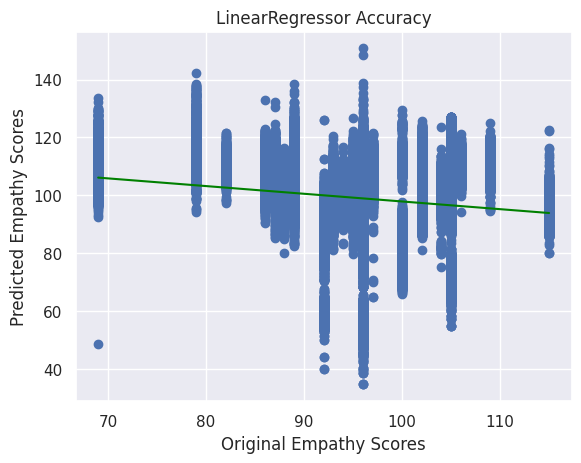

In [46]:
#visualizing the model's prediction accuracy 
#creating a scatterplot of the values
plt.scatter(y_test,y_pred,cmap = 'viridis')
#drawing a line of best fit
plt.plot (np.unique (y_test), np.poly1d (np.polyfit (y_test,y_pred, 1))(np.unique (y_test)), color = 'green') 
#adding titles and labels 
plt.title('LinearRegressor Accuracy')
plt.xlabel('Original Empathy Scores')
plt.ylabel('Predicted Empathy Scores')
plt.show() 